In [1]:
import tensorflow as tf

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

# Import Keras libraries

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Flatten

In [3]:
# load mnist data
mnist = tf.keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

In [4]:
# normalize the data
train_features, test_features = train_features/255.0, test_features/255.0

In [5]:
# build the sequential model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

2022-05-16 05:54:35.992876: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# provide training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train model
model.fit(train_features, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 943us/step - loss: 0.3441 - accuracy: 0.8998
Epoch 2/50
1875/1875 [==============================] - 2s 926us/step - loss: 0.1604 - accuracy: 0.9522
Epoch 3/50
1875/1875 [==============================] - 2s 921us/step - loss: 0.1162 - accuracy: 0.9650
Epoch 4/50
1875/1875 [==============================] - 2s 918us/step - loss: 0.0934 - accuracy: 0.9714
Epoch 5/50
1875/1875 [==============================] - 2s 917us/step - loss: 0.0775 - accuracy: 0.9760
Epoch 6/50
1875/1875 [==============================] - 2s 897us/step - loss: 0.0672 - accuracy: 0.9789
Epoch 7/50
1875/1875 [==============================] - 2s 883us/step - loss: 0.0581 - accuracy: 0.9811
Epoch 8/50
1875/1875 [==============================] - 2s 885us/step - loss: 0.0512 - accuracy: 0.9838
Epoch 9/50
1875/1875 [==============================] - 2s 889us/step - loss: 0.0458 - accuracy: 0.9855
Epoch 10/50
1875/1875 [==============================] - 2s 880u

In [10]:
# test model by calling evaluate()
model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 672us/step - loss: 0.2242 - accuracy: 0.9715


[0.22421348094940186, 0.9714999794960022]

In [11]:
# load a random image from test dataset; 200th image
loc = 200
test_image = test_features[loc]

In [12]:
# view shape of image
test_image.shape

(28, 28)

In [13]:
# reshape image
test_image = test_image.reshape(1, 28, 28)

In [14]:
# call predict() and store output in variable called result
result = model.predict(test_image)
print(result)

[[1.3243749e-23 9.2226690e-22 3.5045666e-10 9.9999976e-01 0.0000000e+00
  4.7475019e-08 9.7370665e-37 3.8477758e-16 2.3680171e-07 4.0813560e-22]]


In [15]:
# use argmax() to find out prediction
result.argmax()

3

In [16]:
test_labels[loc]

3

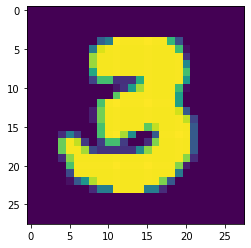

In [17]:
plt.imshow(test_features[loc])